# Installs and imports

In [ ]:
!gdown 12-Gj3dvS0bI9KC1Gj0tvPQjWWJ19J47W

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!pip install calplot

In [ ]:
!pip install tsfresh

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import roll_time_series, make_forecasting_frame
from tsfresh.utilities.dataframe_functions import impute
try:
    import pandas_datareader.data as web
except ImportError:
    print("You need to install the pandas_datareader. Run pip install pandas_datareader.")

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import calplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from sklearn.decomposition import PCA


You need to install the pandas_datareader. Run pip install pandas_datareader.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


# Goals and links


To do:


*   Find Amazon's **stock prices** and **ESG score** for last 4 years
*   Study data using **tsfresh** and explain
*   Benchmark **three prediction models** for stock prices using the previously mentioned data

Tsfresh link : https://github.com/blue-yonder/tsfresh/blob/main/notebooks/05%20Timeseries%20Forecasting.ipynb




# Data preparation and visualization

In [ ]:
path = 'AMZNN.csv'
amzn = pd.read_csv(path)
amzn.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
1,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
3,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
4,2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000


**Date:** date of trading day

**Open:** first price recorded on that trading day

**High:** highest price recorded on that trading day

**Low:** lowest price recorded on that trading day

**Close:** last price recorded on that trading day

**Adj Close:** price accounts for any corporate actions that might affect the stock's price, such as dividends, stock splits, or mergers. Final price of the stock after taking into account these factors.

**Volume:** total number of Amazon shares traded on that trading day & total activity and liquidity of the stock for that day. <br>
(higher volumes -> higher market interest and activity)

In [ ]:
#check for missing values
amzn.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

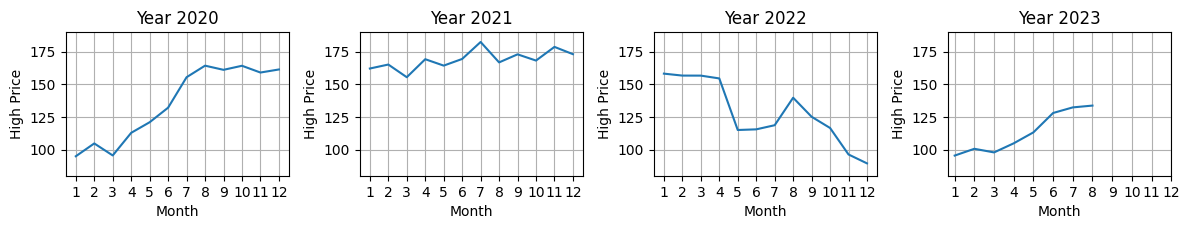

In [ ]:
#Seasonal subseries plot
amzn['Date'] = pd.to_datetime(amzn['Date'])
amzn['Year'] = amzn['Date'].dt.year
amzn['Month'] = amzn['Date'].dt.month
seasonal_subseries_data = amzn.groupby(['Year', 'Month'])['High'].mean().reset_index()
plt.figure(figsize=(12, 6))
for i, year in enumerate(seasonal_subseries_data['Year'].unique(), 1):
    plt.subplot(3, 4, i)
    data = seasonal_subseries_data[seasonal_subseries_data['Year'] == year]
    plt.plot(data['Month'], data['High'])
    plt.title(f'Year {year}')
    plt.xlabel('Month')
    plt.ylabel('High Price')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.ylim(80, 190)

plt.tight_layout()
plt.show()
amzn.drop(columns=['Year', 'Month'], inplace=True)

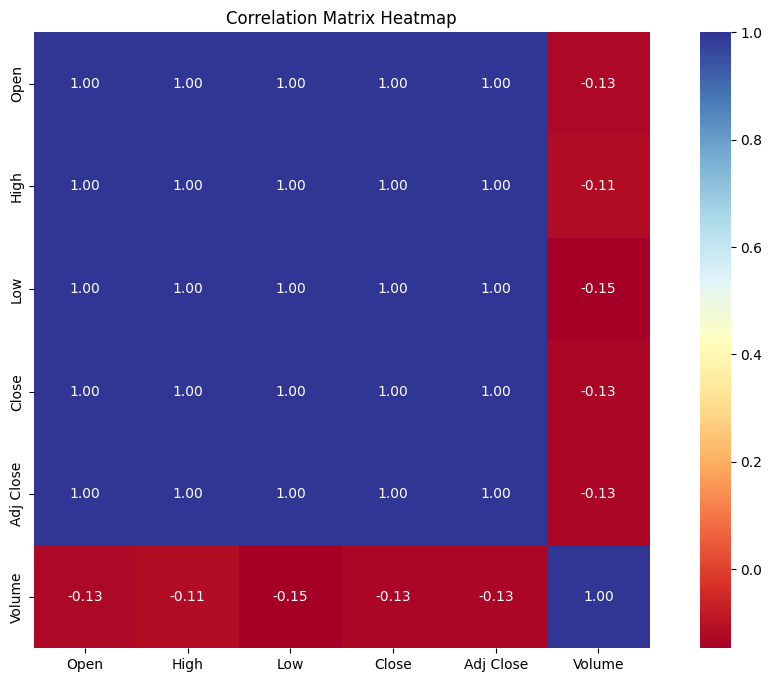

In [ ]:
#Correlation Matrix for all columns except 'Date'
heatmap=amzn.drop('Date', axis=1)
plt.figure(figsize=(13,8))
sns.heatmap(heatmap.corr(),annot=True,cmap='RdYlBu',fmt='.2f',square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


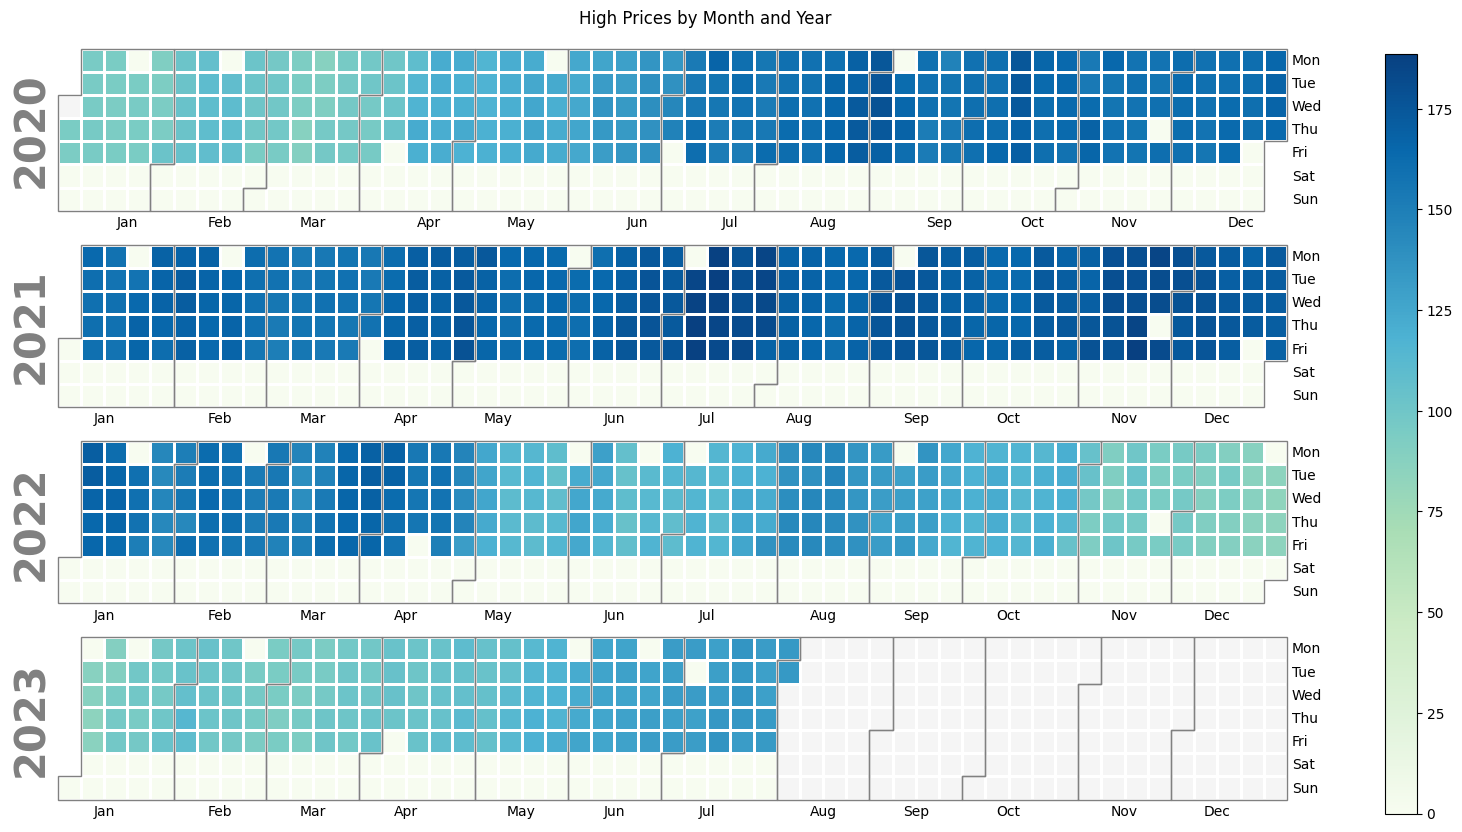

In [ ]:
#Calendar Heatmap
copy = amzn.copy()
copy['Date'] = pd.to_datetime(copy['Date'])
copy.set_index('Date', inplace=True)
pl1 = calplot.calplot(data = copy['High'],how = 'sum', cmap = 'GnBu', figsize = (16, 8), suptitle = "High Prices by Month and Year")

In [ ]:
import pandas as pd
import urllib.request
import json

dataframes = []
url = "https://query2.finance.yahoo.com/v1/finance/esgChart?symbol=AMZN"

connection = urllib.request.urlopen(url)

data = connection.read()
data_2 = json.loads(data)
Formatdata = data_2["esgChart"]["result"][0]["symbolSeries"]
Formatdata_2 = pd.DataFrame(Formatdata)
Formatdata_2["timestamp"] = pd.to_datetime(Formatdata_2["timestamp"], unit="s")


Formatdata_2.set_index("timestamp", inplace=True)
Formatdata_2.tail(10)

,esgScore,governanceScore,environmentScore,socialScore
timestamp,,,,
2021-11-01,NaN,NaN,NaN,NaN
2021-12-01,NaN,NaN,NaN,NaN
2022-01-01,NaN,NaN,NaN,NaN
2022-02-01,30.03,9.84,5.95,14.25
2022-03-01,NaN,NaN,NaN,NaN
2022-04-01,NaN,NaN,NaN,NaN
2022-05-01,30.23,9.84,5.59,14.80
2022-06-01,NaN,NaN,NaN,NaN
2022-07-01,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

#Extracting year and month
amzn['Year'] = amzn['Date'].dt.year
amzn['Month'] = amzn['Date'].dt.month
Formatdata_2['Year'] = Formatdata_2.index.year
Formatdata_2['Month'] = Formatdata_2.index.month

# Merge on year and month
final = amzn.merge(Formatdata_2, how='left', left_on=['Year', 'Month'], right_on=['Year', 'Month'])
final.drop(['Year', 'Month'], axis=1, inplace=True)
final.tail()


,Date,Open,High,Low,Close,Adj Close,Volume,esgScore,governanceScore,environmentScore,socialScore
896,2023-07-26,126.510002,129.080002,126.110001,128.149994,128.149994,53910100,NaN,NaN,NaN,NaN
897,2023-07-27,131.000000,132.630005,127.790001,128.250000,128.250000,52610700,NaN,NaN,NaN,NaN
898,2023-07-28,129.690002,133.009995,129.330002,132.210007,132.210007,46317400,NaN,NaN,NaN,NaN
899,2023-07-31,133.199997,133.869995,132.380005,133.679993,133.679993,41901500,NaN,NaN,NaN,NaN
900,2023-08-01,133.550003,133.690002,131.619995,131.690002,131.690002,42098500,NaN,NaN,NaN,NaN


In [ ]:
len(final)

901

In [ ]:
#Check for missing values
final.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
esgScore            609
governanceScore     609
environmentScore    609
socialScore         609
dtype: int64

In [ ]:
mean_esg = final['esgScore'].mean()
final['esgScore'].fillna(mean_esg, inplace=True)

In [ ]:
columns_to_drop = ['governanceScore', 'environmentScore', 'socialScore']
final.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
#Check for missing values
final.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
esgScore     0
dtype: int64

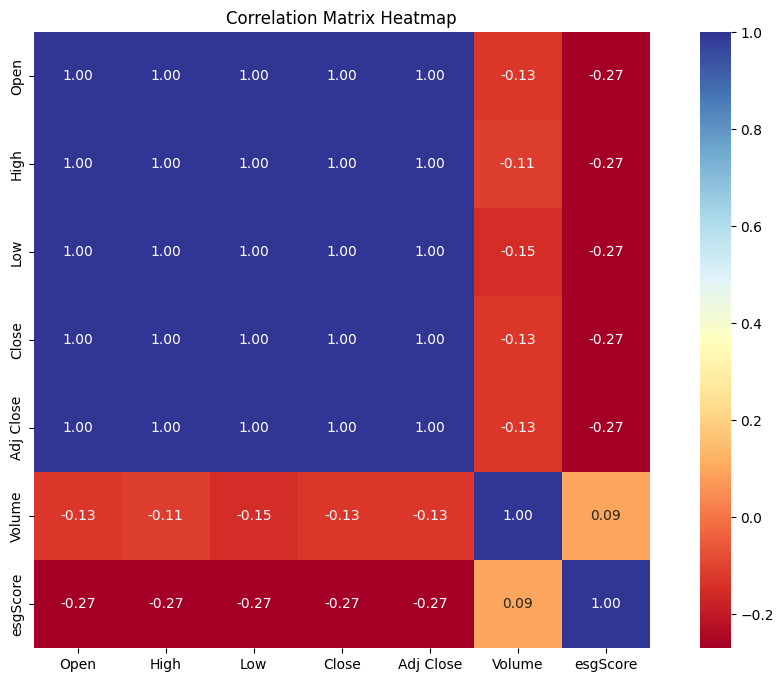

In [ ]:
#Correlation Matrix for all columns except 'Date'
heatmap=final.drop('Date', axis=1)
plt.figure(figsize=(13,8))
sns.heatmap(heatmap.corr(),annot=True,cmap='RdYlBu',fmt='.2f',square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Tsfresh

In [ ]:
final["Date"] = pd.to_datetime(final["Date"])
tsfresh = final.copy()
tsfresh.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,esgScore
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,30.57
1,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,30.57
2,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,30.57
3,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,30.57
4,2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000,30.57
5,2020-01-09,95.494499,95.890999,94.790001,95.052498,95.052498,63346000,30.57
6,2020-01-10,95.268501,95.347000,94.000000,94.157997,94.157997,57074000,30.57
7,2020-01-13,94.565498,94.900002,94.040001,94.565002,94.565002,55616000,30.57
8,2020-01-14,94.293999,94.355499,92.927498,93.472000,93.472000,68818000,30.57
9,2020-01-15,93.612503,93.943001,92.754501,93.100998,93.100998,57932000,30.57


In [ ]:
tsfresh['Date'] = pd.to_datetime(tsfresh['Date'])
tsfresh.set_index('Date', inplace=True)

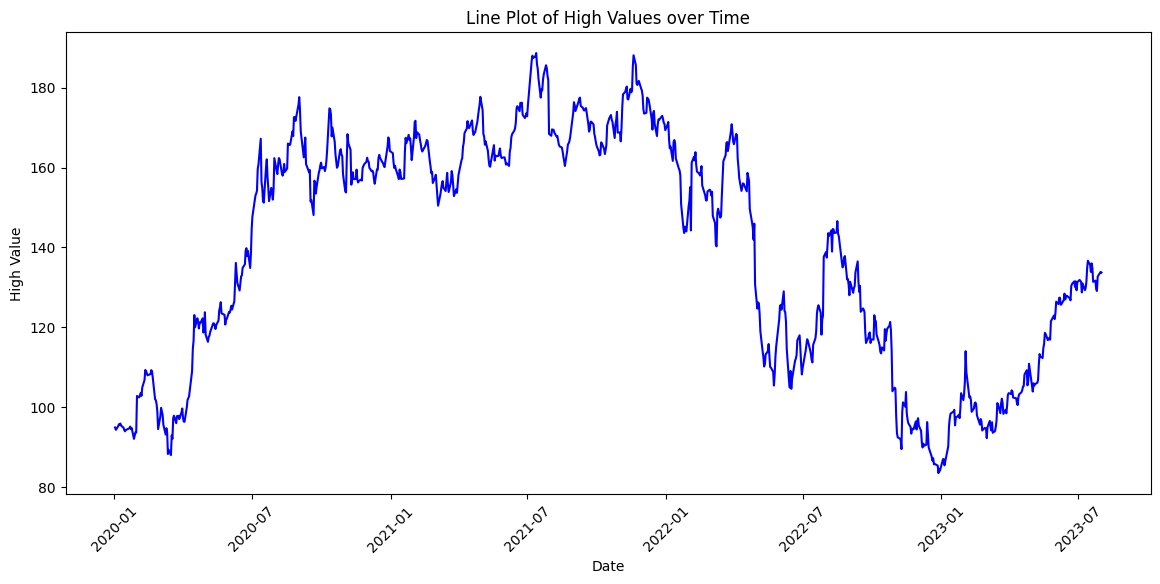

In [ ]:
#plot for High
plt.figure(figsize=(14, 6))
plt.plot(tsfresh.index, tsfresh['High'], linestyle='-', color='b')

plt.xlabel('Date')
plt.ylabel('High Value')
plt.title('Line Plot of High Values over Time')

plt.xticks(rotation=45)

plt.show()

In [ ]:
tsfresh["date"] = tsfresh.index
tsfresh["Symbols"]="AMZN"
tsfresh.drop(columns=['Open', 'Volume','Low','Close','Adj Close'], inplace=True)
tsfresh.head(20)

,High,esgScore,date,Symbols
Date,,,,
2020-01-02,94.900497,30.57,2020-01-02,AMZN
2020-01-03,94.309998,30.57,2020-01-03,AMZN
2020-01-06,95.184502,30.57,2020-01-06,AMZN
2020-01-07,95.694504,30.57,2020-01-07,AMZN
2020-01-08,95.550003,30.57,2020-01-08,AMZN
2020-01-09,95.890999,30.57,2020-01-09,AMZN
2020-01-10,95.347000,30.57,2020-01-10,AMZN
2020-01-13,94.900002,30.57,2020-01-13,AMZN
2020-01-14,94.355499,30.57,2020-01-14,AMZN


## Rolling windows and feature extraction

In [ ]:
df_rolled = roll_time_series(tsfresh, column_id="Symbols", column_sort="date",
                             max_timeshift=20, min_timeshift=5)

C:\Users\anast\AppData\Local\Programs\Python\Python311\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(
Rolling: 100%|█████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.24it/s]


In [ ]:
print("len tsfresh",len(tsfresh))
print("len df_rolled",len(df_rolled))

len tsfresh 901
len df_rolled 18696


In [ ]:
df_rolled.head(20)

,High,esgScore,date,Symbols,id
0,94.900497,30.57,2020-01-02,AMZN,"(AMZN, 2020-01-09 00:00:00)"
1,94.309998,30.57,2020-01-03,AMZN,"(AMZN, 2020-01-09 00:00:00)"
2,95.184502,30.57,2020-01-06,AMZN,"(AMZN, 2020-01-09 00:00:00)"
3,95.694504,30.57,2020-01-07,AMZN,"(AMZN, 2020-01-09 00:00:00)"
4,95.550003,30.57,2020-01-08,AMZN,"(AMZN, 2020-01-09 00:00:00)"
5,95.890999,30.57,2020-01-09,AMZN,"(AMZN, 2020-01-09 00:00:00)"
6,94.900497,30.57,2020-01-02,AMZN,"(AMZN, 2020-01-10 00:00:00)"
7,94.309998,30.57,2020-01-03,AMZN,"(AMZN, 2020-01-10 00:00:00)"
8,95.184502,30.57,2020-01-06,AMZN,"(AMZN, 2020-01-10 00:00:00)"
9,95.694504,30.57,2020-01-07,AMZN,"(AMZN, 2020-01-10 00:00:00)"


In [ ]:
X = extract_features(df_rolled.drop("Symbols", axis=1),
                     column_id="id", column_sort="date", column_value="High",
                     impute_function=impute, show_warnings=False)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:20<00:00,  1.00s/it]


In [ ]:
X.head()

High__variance_larger_than_standard_deviation  \
AMZN 2020-01-09                                            0.0   
     2020-01-10                                            0.0   
     2020-01-13                                            0.0   
     2020-01-14                                            0.0   
     2020-01-15                                            0.0   

                 High__has_duplicate_max  High__has_duplicate_min  \
AMZN 2020-01-09                      0.0                      0.0   
     2020-01-10                      0.0                      0.0   
     2020-01-13                      0.0                      0.0   
     2020-01-14                      0.0                      0.0   
     2020-01-15                      0.0                      0.0   

                 High__has_duplicate  High__sum_values  High__abs_energy  \
AMZN 2020-01-09                  0.0        571.530503      54442.894333   
     2020-01-10                  0.0        666.877503      63533.944742   
     2020-01-13                  0.0        761.777505      72539.955122   
     2020-01-14                  0.0        856.133004      81442.915313   
     2020-01-15                  0.0        950.076005      90268.202750   

                 High__mean_abs_change  High__mean_change  \
AMZN 2020-01-09               0.492100           0.198100   
     2020-01-10               0.500750           0.074417   
     2020-01-13               0.493071          -0.000071   
     2020-01-14               0.499500          -0.068125   
     2020-01-15               0.489833          -0.106388   

                 High__mean_second_derivative_central  High__median  ...  \
AMZN 2020-01-09                              0.116437     95.367253  ...   
     2020-01-10                              0.004650     95.347000  ...   
     2020-01-13                              0.011958     95.265751  ...   
     2020-01-14                              0.003285     95.184502  ...   
     2020-01-15                              0.011125     95.042499  ...   

                 High__fourier_entropy__bins_5  \
AMZN 2020-01-09                       1.039721   
     2020-01-10                       1.039721   
     2020-01-13                       0.950271   
     2020-01-14                       0.950271   
     2020-01-15                       0.867563   

                 High__fourier_entropy__bins_10  \
AMZN 2020-01-09                        1.386294   
     2020-01-10                        1.386294   
     2020-01-13                        1.332179   
     2020-01-14                        0.950271   
     2020-01-15                        1.242453   

                 High__fourier_entropy__bins_100  \
AMZN 2020-01-09                         1.386294   
     2020-01-10                         1.386294   
     2020-01-13                         1.332179   
     2020-01-14                         1.609438   
     2020-01-15                         1.560710   

                 High__permutation_entropy__dimension_3__tau_1  \
AMZN 2020-01-09                                       1.039721   
     2020-01-10                                       1.332179   
     2020-01-13                                       1.560710   
     2020-01-14                                       1.549826   
     2020-01-15                                       1.494175   

                 High__permutation_entropy__dimension_4__tau_1  \
AMZN 2020-01-09                                       1.098612   
     2020-01-10                                       1.386294   
     2020-01-13                                       1.609438   
     2020-01-14                                       1.791759   
     2020-01-15                                       1.747868   

                 High__permutation_entropy__dimension_5__tau_1  \
AMZN 2020-01-09                                       0.693147   
     2020-01-10                                       1.098612   
     2020-0

In [ ]:
X = X.set_index(X.index.map(lambda x: x[1]), drop=True)
X.index.name = "last_date"
X.head()

,High__variance_larger_than_standard_deviation,High__has_duplicate_max,High__has_duplicate_min,High__has_duplicate,High__sum_values,High__abs_energy,High__mean_abs_change,High__mean_change,High__mean_second_derivative_central,High__median,...,High__fourier_entropy__bins_5,High__fourier_entropy__bins_10,High__fourier_entropy__bins_100,High__permutation_entropy__dimension_3__tau_1,High__permutation_entropy__dimension_4__tau_1,High__permutation_entropy__dimension_5__tau_1,High__permutation_entropy__dimension_6__tau_1,High__permutation_entropy__dimension_7__tau_1,High__query_similarity_count__query_None__threshold_0.0,High__mean_n_absolute_max__number_of_maxima_7
last_date,,,,,,,,,,,,,,,,,,,,,
2020-01-09,0.0,0.0,0.0,0.0,571.530503,54442.894333,0.492100,0.198100,0.116437,95.367253,...,1.039721,1.386294,1.386294,1.039721,1.098612,0.693147,-0.000000,2.708050,0.0,157.806107
2020-01-10,0.0,0.0,0.0,0.0,666.877503,63533.944742,0.500750,0.074417,0.004650,95.347000,...,1.039721,1.386294,1.386294,1.332179,1.386294,1.098612,0.693147,-0.000000,0.0,157.806107
2020-01-13,0.0,0.0,0.0,0.0,761.777505,72539.955122,0.493071,-0.000071,0.011958,95.265751,...,0.950271,1.332179,1.332179,1.560710,1.609438,1.386294,1.098612,0.693147,0.0,95.352501
2020-01-14,0.0,0.0,0.0,0.0,856.133004,81442.915313,0.499500,-0.068125,0.003285,95.184502,...,0.950271,0.950271,1.609438,1.549826,1.791759,1.609438,1.386294,1.098612,0.0,95.352501
2020-01-15,0.0,0.0,0.0,0.0,950.076005,90268.202750,0.489833,-0.106388,0.011125,95.042499,...,0.867563,1.242453,1.560710,1.494175,1.747868,1.791759,1.609438,1.386294,0.0,95.352501


In [ ]:
y = tsfresh.set_index("date").sort_index().High.shift(-1)
y = y[y.index.isin(X.index)]
X = X[X.index.isin(y.index)]

# PCA

In [ ]:
X.head()

,High__variance_larger_than_standard_deviation,High__has_duplicate_max,High__has_duplicate_min,High__has_duplicate,High__sum_values,High__abs_energy,High__mean_abs_change,High__mean_change,High__mean_second_derivative_central,High__median,...,High__fourier_entropy__bins_5,High__fourier_entropy__bins_10,High__fourier_entropy__bins_100,High__permutation_entropy__dimension_3__tau_1,High__permutation_entropy__dimension_4__tau_1,High__permutation_entropy__dimension_5__tau_1,High__permutation_entropy__dimension_6__tau_1,High__permutation_entropy__dimension_7__tau_1,High__query_similarity_count__query_None__threshold_0.0,High__mean_n_absolute_max__number_of_maxima_7
last_date,,,,,,,,,,,,,,,,,,,,,
2020-01-09,0.0,0.0,0.0,0.0,571.530503,54442.894333,0.492100,0.198100,0.116437,95.367253,...,1.039721,1.386294,1.386294,1.039721,1.098612,0.693147,-0.000000,2.708050,0.0,157.806107
2020-01-10,0.0,0.0,0.0,0.0,666.877503,63533.944742,0.500750,0.074417,0.004650,95.347000,...,1.039721,1.386294,1.386294,1.332179,1.386294,1.098612,0.693147,-0.000000,0.0,157.806107
2020-01-13,0.0,0.0,0.0,0.0,761.777505,72539.955122,0.493071,-0.000071,0.011958,95.265751,...,0.950271,1.332179,1.332179,1.560710,1.609438,1.386294,1.098612,0.693147,0.0,95.352501
2020-01-14,0.0,0.0,0.0,0.0,856.133004,81442.915313,0.499500,-0.068125,0.003285,95.184502,...,0.950271,0.950271,1.609438,1.549826,1.791759,1.609438,1.386294,1.098612,0.0,95.352501
2020-01-15,0.0,0.0,0.0,0.0,950.076005,90268.202750,0.489833,-0.106388,0.011125,95.042499,...,0.867563,1.242453,1.560710,1.494175,1.747868,1.791759,1.609438,1.386294,0.0,95.352501


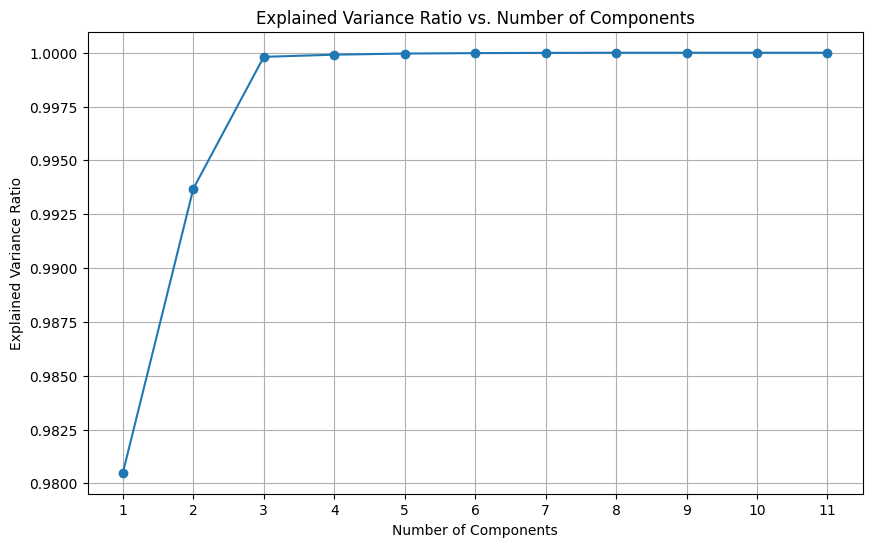

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


# range of component numbers to iterate over
num_components_range = range(1, 12)

explained_variance_ratios = []

for n_components in num_components_range:
    pca = PCA(n_components=n_components)
    pca.fit(X)
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 6))
plt.plot(num_components_range, explained_variance_ratios, marker='o')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(num_components_range)
plt.grid(True)
plt.show()


In [ ]:
print("Explained variance for 3 components",explained_variance_ratios[2]);
print("Explained variance for 4 components",explained_variance_ratios[3]);
print("Difference in variance between the two",(explained_variance_ratios[3]-explained_variance_ratios[2])*1000)

Explained variance for 3 components 0.9998079813789866
Explained variance for 4 components 0.9999087573219286
Difference in variance between the two 0.10077594294199965


In [ ]:
print("Explained variance for 4 components",explained_variance_ratios[3]);
print("Explained variance for 5 components",explained_variance_ratios[4]);
print("Difference in variance between the two",(explained_variance_ratios[4]-explained_variance_ratios[3])*1000)

Explained variance for 4 components 0.9999087573219286
Explained variance for 5 components 0.9999607593175488
Difference in variance between the two 0.05200199562016561


In [ ]:
pca = PCA(n_components=n_components)
pca.fit(X)

PCA(n_components=11)

In [ ]:
# Find the indices of NaN values in y
Yindex = y[y.isnull()].index
y = y.dropna()
X = X.drop(Yindex)

In [ ]:
#creating dataframe with 3 components
pca = PCA(n_components=3)
pca.fit(X)

# transform with pca
transformed_data = pca.transform(X)

column_names = [f"PC{i+1}" for i in range(3)]
df_pca = pd.DataFrame(transformed_data, columns=column_names)
print(df_pca)


              PC1           PC2           PC3
0   -4.305649e+06  7.077523e+06  59002.410861
1   -3.774050e+06  3.574874e+06  27527.426162
2   -3.769079e+06  2.804572e+06  25789.747020
3   -3.772171e+06  3.027105e+06  37788.886359
4   -3.774262e+06  2.959518e+06  47719.714148
..            ...           ...           ...
890 -1.234148e+06  3.652027e+04 -16179.934746
891 -1.233400e+06  3.353584e+04   -418.693878
892 -1.225152e+06  5.648913e+04   2449.971999
893 -1.221863e+06  4.814321e+04   1397.576053
894 -1.211616e+06  5.501732e+04  -7789.111153

[895 rows x 3 columns]


# Prediction models

## Linear Regression

### Split data by years

In [ ]:
scaler = MinMaxScaler()

In [ ]:
print("Y test NaN",X.isnull().sum().sum())
print("Y pred NaN",y.isnull().sum())


Y test NaN 0
Y pred NaN 0


In [ ]:
# Find the indices of NaN values in y
Yindex = y[y.isnull()].index
y = y.dropna()
X = X.drop(Yindex)

In [ ]:
#before scaling
len(X.columns)

783

In [ ]:

X= select_features(X, y)
NotScaled = X.copy()
#Scaling data

# X[X.columns]= scaler.fit_transform(X[X.columns])


X_train = X[:"2021"]
X_test = X["2022":]

y_train = y[:"2021"]
y_test = y["2022":]

X_train_selected = select_features(X_train, y_train)


ada = LinearRegression()
ada.fit(X_train_selected, y_train)

X_test_selected = X_test[X_train_selected.columns]


y_pred = pd.Series(ada.predict(X_test_selected), index=X_test_selected.index)

In [ ]:
#after scaling
len(X.columns)

179

In [ ]:
# # Find NaN values in y_test
# Yindex = y_test[y_test.isnull()].index
# y_test = y_test.dropna()
# y_pred = y_pred.drop(Yindex)

In [ ]:
# print("Y test NaN",y_test.isnull().sum())
# print("Y pred NaN",y_pred.isnull().sum())
# print("X test NaN",X_train_selected.isnull().sum().sum())
# print("X train NaN",X_test_selected.isnull().sum().sum())

<Axes: xlabel='last_date'>

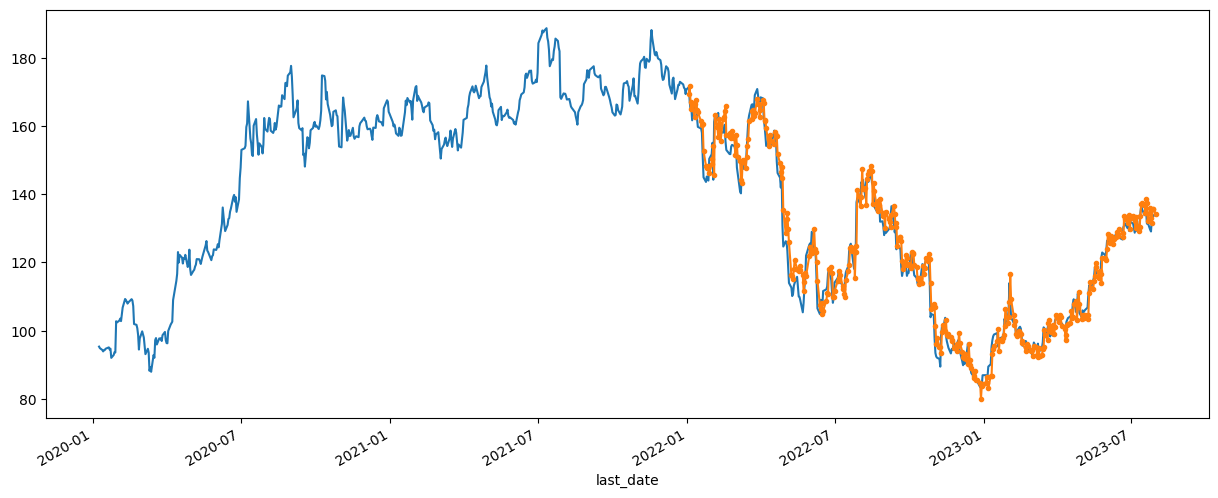

In [ ]:
plt.figure(figsize=(15, 6))

y.plot(ax=plt.gca())
y_pred.plot(ax=plt.gca(), legend=None, marker=".")

In [ ]:

mse_split = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_split:.4f}")

rmse_split = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse_split:.4f}")

mae_split = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae_split:.4f}")

r2_split = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2_split:.4f}")


Mean Squared Error (MSE): 15.7044
Root Mean Squared Error (RMSE): 3.9629
Mean Absolute Error (MAE): 3.0284
R-squared (R²): 0.9692


<Axes: xlabel='last_date'>

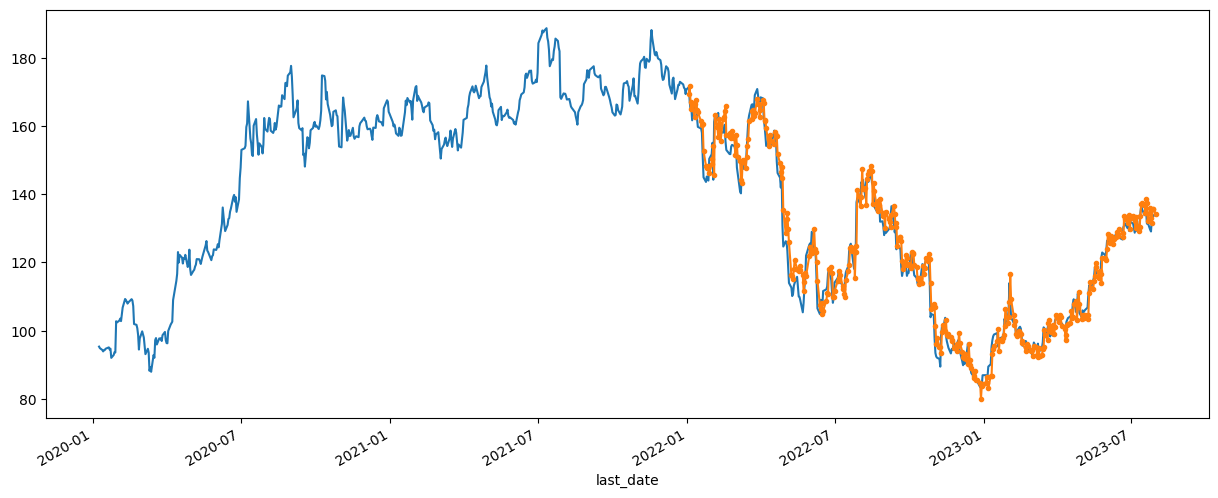

In [ ]:
plt.figure(figsize=(15, 6))

y.plot(ax=plt.gca())
y_pred.plot(ax=plt.gca(), legend=None, marker=".")

### Cross Validation

In [ ]:
model = LinearRegression()

#evaluation metrics to use
scoring = {
    'mse': 'neg_mean_squared_error',
    'rmse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2'
}

cv_results = cross_validate(model,X , y, cv=5, scoring=scoring)

# Get the mean and standard deviation for each metric across folds
mse_cv_mean = -cv_results['test_mse'].mean()
mse_cv_std = cv_results['test_mse'].std()
rmse_cv_mean = (-cv_results['test_rmse']).mean()
rmse_cv_std = (-cv_results['test_rmse']).std()
mae_cv_mean = -cv_results['test_mae'].mean()
mae_cv_std = cv_results['test_mae'].std()
r2_cv_mean = cv_results['test_r2'].mean()
r2_cv_std = cv_results['test_r2'].std()

mse_cv = f"{mse_cv_mean:.2f} +/- {mse_cv_std:.2f}"
rmse_cv = f"{rmse_cv_mean:.2f} +/- {rmse_cv_std:.2f}"
mae_cv = f"{mae_cv_mean:.2f} +/- {mae_cv_std:.2f}"
r2_cv = f"{r2_cv_mean:.2f} +/- {r2_cv_std:.2f}"


print(f"Mean Squared Error (MSE) - Cross-validated:",mse_cv)
print(f"Root Mean Squared Error (RMSE) - Cross-validated:",rmse_cv)
print(f"Mean Absolute Error (MAE) - Cross-validated:",mae_cv)
print(f"R-squared (R²) - Cross-validated:",r2_cv)


Mean Squared Error (MSE) - Cross-validated: 617.76 +/- 1210.25
Root Mean Squared Error (RMSE) - Cross-validated: 617.76 +/- 1210.25
Mean Absolute Error (MAE) - Cross-validated: 5.22 +/- 5.38
R-squared (R²) - Cross-validated: 0.02 +/- 1.68


### *Random*

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


n_splits = 60

split_data = np.array_split(X, n_splits)


split_target = np.array_split(y, n_splits)

split_results = []

X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

for X1, y1 in zip(split_data, split_target):
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=None)

    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(pd.Series(y_train, name='y_train'))
    y_test_list.append(pd.Series(y_test, name='y_test'))

# random set to be used for later models
X_train_r = pd.concat(X_train_list)
X_test_r = pd.concat(X_test_list)
y_train_r = pd.concat(y_train_list)
y_test_r = pd.concat(y_test_list)

In [ ]:
# plt.figure(figsize=(15, 6))

# y.plot(ax=plt.gca())
# y_test_r.plot(ax=plt.gca(), legend=None, marker=".")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

ada = LinearRegression()
ada.fit(X_train_r, y_train_r)

y_pred = ada.predict(X_test_r)

# series with the predicted values and the same index as X_test_r
y_pred = pd.Series(y_pred, index=X_test_r.index)


y_pred.index.name = 'date'

In [ ]:
# Find NaN values in y_test
Yindex = y_test_r[y_test_r.isnull()].index
y_test_r = y_test_r.dropna()
y_pred = y_pred.drop(Yindex)


In [ ]:

mse_random = mean_squared_error(y_test_r, y_pred)
print(f"Mean Squared Error (MSE): {mse_random:.4f}")


rmse_random = mean_squared_error(y_test_r, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse_random:.4f}")


mae_random = mean_absolute_error(y_test_r, y_pred)
print(f"Mean Absolute Error (MAE): {mae_random:.4f}")


r2_random = r2_score(y_test_r, y_pred)
print(f"R-squared (R²): {r2_random:.4f}")


Mean Squared Error (MSE): 21.2036
Root Mean Squared Error (RMSE): 4.6047
Mean Absolute Error (MAE): 2.7400
R-squared (R²): 0.9748


### *Comparison of methods*

In [ ]:
data = {
    'Model':["Split LinearReg","Cross-validation LinearReg","Random LinearReg"],
    'MAE':[mae_split, mae_cv, mae_random],
    'RMSE':[rmse_split, rmse_cv, rmse_random],
    'MSE':[mse_split, mse_cv, mse_random ],
    'R2':[r2_split, r2_cv,r2_random]
}

#Creating dataframe with all metrics for eval
df1= pd.DataFrame(data)
df1



,Model,MAE,RMSE,MSE,R2
0,Split LinearReg,3.02839,3.962877,15.704397,0.969236
1,Cross-validation LinearReg,5.22 +/- 5.38,617.76 +/- 1210.25,617.76 +/- 1210.25,0.02 +/- 1.68
2,Random LinearReg,2.740009,4.604736,21.203592,0.974795


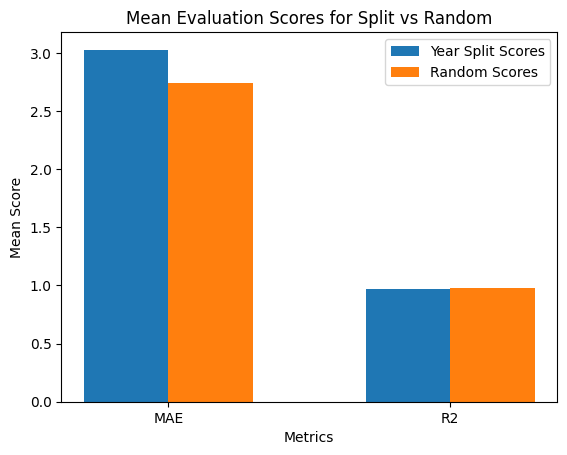

In [ ]:
metrics = ['MAE', 'R2']
mean_scores_split = [mae_split,  r2_split]
mean_scores_random = [mae_random, r2_random]

bar_width = 0.30

x = np.arange(len(metrics))

plt.bar(x - bar_width/2, mean_scores_split, bar_width, label='Year Split Scores')
plt.bar(x + bar_width/2, mean_scores_random, bar_width, label='Random Scores')


plt.xlabel('Metrics')
plt.ylabel('Mean Score')
plt.title('Mean Evaluation Scores for Split vs Random')
plt.xticks(x, metrics)
plt.legend()

plt.show()


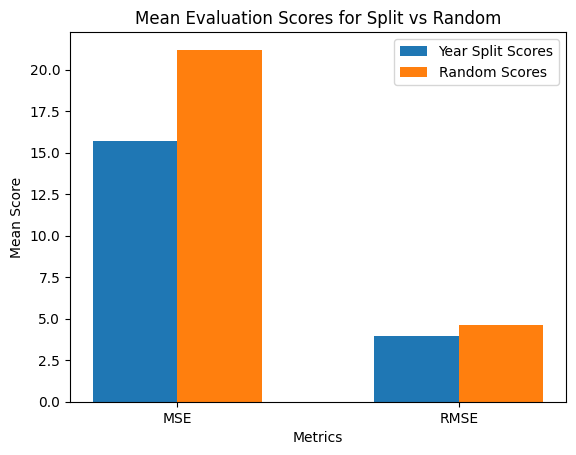

In [ ]:
metrics = ['MSE',  'RMSE']
mean_scores_split = [mse_split,  rmse_split]
mean_scores_random = [mse_random,  rmse_random]

bar_width = 0.30

x = np.arange(len(metrics))


plt.bar(x - bar_width/2, mean_scores_split, bar_width, label='Year Split Scores')
plt.bar(x + bar_width/2, mean_scores_random, bar_width, label='Random Scores')


plt.xlabel('Metrics')
plt.ylabel('Mean Score')
plt.title('Mean Evaluation Scores for Split vs Random')
plt.xticks(x, metrics)
plt.legend()

plt.show()


## Forest

### Split data by years

In [ ]:
X_train = X[:"2021"]
X_test = X["2022":]

y_train = y[:"2021"]
y_test = y["2022":]

X_train_selected = select_features(X_train, y_train)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_selected, y_train)

X_test_selected = X_test[X_train_selected.columns]

y_pred = pd.Series(model.predict(X_test_selected), index=X_test_selected.index)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.4f}")



Mean Squared Error (MSE): 208.1395
Root Mean Squared Error (RMSE): 14.4270
Mean Absolute Error (MAE): 10.7819
R-squared (R²): 0.5923


### Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate

model = RandomForestRegressor(n_estimators=100, random_state=42)

scoring = {
    'mse': 'neg_mean_squared_error',
    'rmse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2'
}

cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)


mse_cv_mean = -cv_results['test_mse'].mean()
mse_cv_std = cv_results['test_mse'].std()
rmse_cv_mean = (-cv_results['test_rmse']).mean()
rmse_cv_std = (-cv_results['test_rmse']).std()
mae_cv_mean = -cv_results['test_mae'].mean()
mae_cv_std = cv_results['test_mae'].std()
r2_cv_mean = cv_results['test_r2'].mean()
r2_cv_std = cv_results['test_r2'].std()

mse_cv = f"{mse_cv_mean:.2f} +/- {mse_cv_std:.2f}"
rmse_cv = f"{rmse_cv_mean:.2f} +/- {rmse_cv_std:.2f}"
mae_cv = f"{mae_cv_mean:.2f} +/- {mae_cv_std:.2f}"
r2_cv = f"{r2_cv_mean:.2f} +/- {r2_cv_std:.2f}"

print(f"Mean Squared Error (MSE) - Cross-validated:",mse_cv)
print(f"Root Mean Squared Error (RMSE) - Cross-validated:",rmse_cv)
print(f"Mean Absolute Error (MAE) - Cross-validated:",mae_cv)
print(f"R-squared (R²) - Cross-validated:",r2_cv)


Mean Squared Error (MSE) - Cross-validated: 99.36 +/- 88.23
Root Mean Squared Error (RMSE) - Cross-validated: 99.36 +/- 88.23
Mean Absolute Error (MAE) - Cross-validated: 7.05 +/- 3.18
R-squared (R²) - Cross-validated: 0.47 +/- 0.34


### Random

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

data = pd.concat([X, y], axis=1)

# Define the number of segments for splitting
num_segments = 8

segment_size = len(data) // num_segments

r2_scores = []
mse_scores = []
rmse_scores = []
mae_scores = []


num_iterations = 10

# Loop for 10 iterations
for iteration in range(num_iterations):

    model.fit(X_train_r, y_train_r)

    y_pred = model.predict(X_test_r)
    y_pred = pd.Series(y_pred, index=X_test_r.index)

    # Calculate evaluation metrics for this iteration
    r2_scores.append(r2_score(y_test_r, y_pred))
    mse_scores.append(mean_squared_error(y_test_r, y_pred))
    rmse_scores.append(mean_squared_error(y_test_r, y_pred, squared=False))
    mae_scores.append(mean_absolute_error(y_test_r, y_pred))

# Calculate the mean value for each evaluation metric across all 10 iterations
r2_random = np.mean(r2_scores)
mse_random = np.mean(mse_scores)
rmse_random = np.mean(rmse_scores)
mae_random = np.mean(mae_scores)

print(f"Mean Mean Squared Error (MSE) across 10 iterations: {mse_random:.4f}")
print(f"Mean Root Mean Squared Error (RMSE) across 10 iterations: {rmse_random:.4f}")
print(f"Mean Mean Absolute Error (MAE) across 10 iterations: {mae_random:.4f}")
print(f"Mean R-squared (R²) across 10 iterations: {r2_random:.4f}")


Mean Mean Squared Error (MSE) across 10 iterations: 12.7729
Mean Root Mean Squared Error (RMSE) across 10 iterations: 3.5739
Mean Mean Absolute Error (MAE) across 10 iterations: 2.5995
Mean R-squared (R²) across 10 iterations: 0.9848


### *Comparison of methods*

In [ ]:
data2 = {
    'Model':["Split Forest","Cross-validation Forest","Random Forest"],
    'MAE':[mae_split, mae_cv, mae_random],
    'RMSE':[rmse_split, rmse_cv, rmse_random],
    'MSE':[mse_split, mse_cv, mse_random ],
    'R2':[r2_split, r2_cv,r2_random]
}

#Creating dataframe with all metrics for eval
df2= pd.DataFrame(data2)
df2


,Model,MAE,RMSE,MSE,R2
0,Split Forest,3.02839,3.962877,15.704397,0.969236
1,Cross-validation Forest,7.05 +/- 3.18,99.36 +/- 88.23,99.36 +/- 88.23,0.47 +/- 0.34
2,Random Forest,2.599535,3.573921,12.772912,0.984817


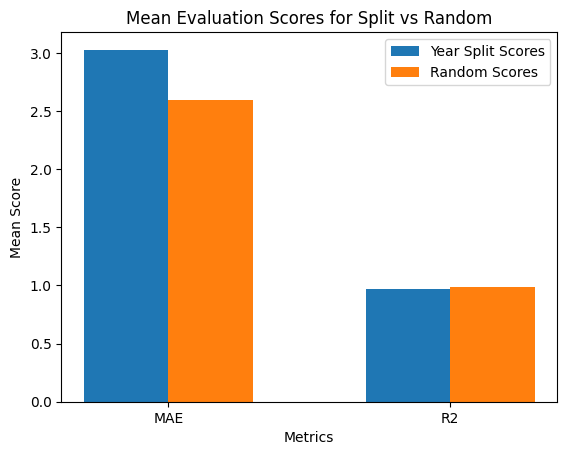

In [ ]:
metrics = ['MAE', 'R2']
mean_scores_split = [mae_split,  r2_split]
mean_scores_random = [mae_random, r2_random]

bar_width = 0.30

x = np.arange(len(metrics))

plt.bar(x - bar_width/2, mean_scores_split, bar_width, label='Year Split Scores')
plt.bar(x + bar_width/2, mean_scores_random, bar_width, label='Random Scores')


plt.xlabel('Metrics')
plt.ylabel('Mean Score')
plt.title('Mean Evaluation Scores for Split vs Random')
plt.xticks(x, metrics)
plt.legend()

plt.show()


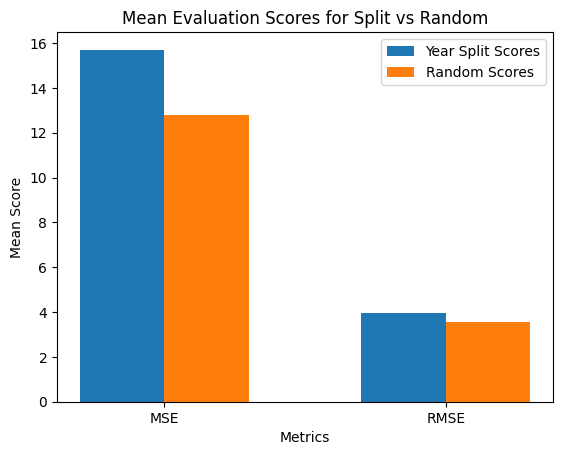

In [ ]:
metrics = ['MSE',  'RMSE']
mean_scores_split = [mse_split,  rmse_split]
mean_scores_random = [mse_random,  rmse_random]

bar_width = 0.30

x = np.arange(len(metrics))


plt.bar(x - bar_width/2, mean_scores_split, bar_width, label='Year Split Scores')
plt.bar(x + bar_width/2, mean_scores_random, bar_width, label='Random Scores')


plt.xlabel('Metrics')
plt.ylabel('Mean Score')
plt.title('Mean Evaluation Scores for Split vs Random')
plt.xticks(x, metrics)
plt.legend()

plt.show()


## Comparison of models Linear Regression and Random Forest

In [ ]:
merged_df = pd.concat([df1, df2], axis=0)
merged_df

,Model,MAE,RMSE,MSE,R2
0,Split LinearReg,3.02839,3.962877,15.704397,0.969236
1,Cross-validation LinearReg,5.22 +/- 5.38,617.76 +/- 1210.25,617.76 +/- 1210.25,0.02 +/- 1.68
2,Random LinearReg,2.740009,4.604736,21.203592,0.974795
0,Split Forest,3.02839,3.962877,15.704397,0.969236
1,Cross-validation Forest,7.05 +/- 3.18,99.36 +/- 88.23,99.36 +/- 88.23,0.47 +/- 0.34
2,Random Forest,2.599535,3.573921,12.772912,0.984817


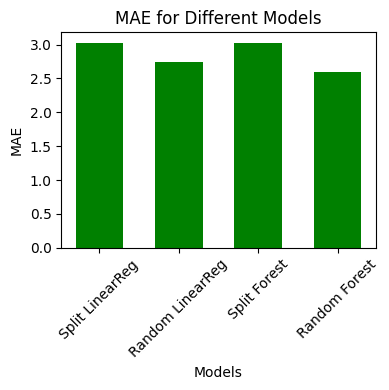

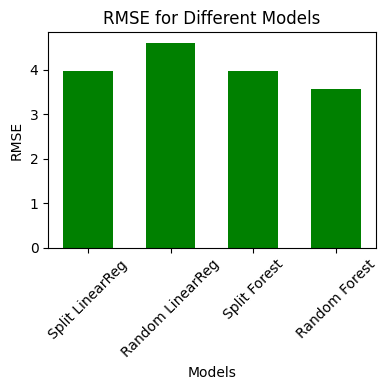

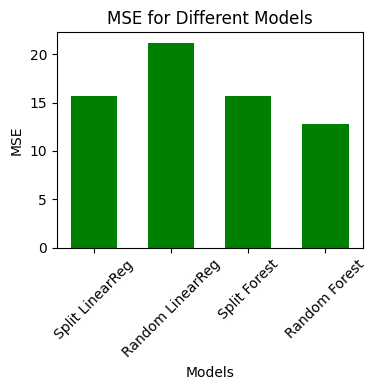

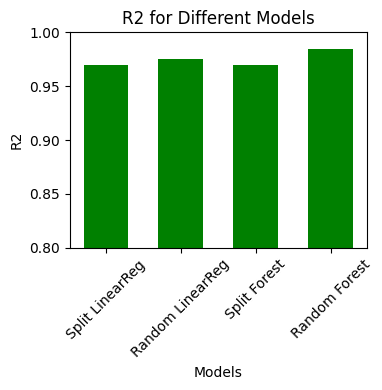

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

merged_df = pd.concat([df1, df2], axis=0)

merged_c = merged_df.drop(merged_df.index[1])
evaluation_metrics = ['MAE', 'RMSE', 'MSE', 'R2']

for idx, metric in enumerate(evaluation_metrics):
    plt.figure(figsize=(4, 4))

    bar_width = 0.5 if idx == len(evaluation_metrics) - 1 else 0.8

    plt.bar(merged_c['Model'], merged_c[metric], color='green', width=0.6)
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models')
    plt.xticks(rotation=45)

    if idx == len(evaluation_metrics) - 1:
        # Set the y-axis limits to go from 0.8 to 1.0 for the last metric
        plt.ylim(0.8, 1.0)

    plt.tight_layout()
    plt.savefig(f'{metric}_plot.png')
    plt.show()

## SVM

In [ ]:
num_segments = 4
segment_size = len(X) // num_segments

X_segments = np.array_split(X, num_segments)
y_segments = np.array_split(y, num_segments)

In [ ]:
X_1 = pd.concat([pd.DataFrame(X_train_r), pd.DataFrame(y_train_r)], ignore_index=True)

In [ ]:
X_1.head()

,"High__cwt_coefficients__coeff_14__w_10__widths_(2, 5, 10, 20)","High__cwt_coefficients__coeff_13__w_10__widths_(2, 5, 10, 20)",High__minimum,"High__cwt_coefficients__coeff_14__w_20__widths_(2, 5, 10, 20)","High__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","High__cwt_coefficients__coeff_13__w_20__widths_(2, 5, 10, 20)",High__quantile__q_0.1,"High__cwt_coefficients__coeff_12__w_10__widths_(2, 5, 10, 20)",High__mean,"High__fft_coefficient__attr_""real""__coeff_0",...,High__number_peaks__n_3,"High__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""min""","High__fft_coefficient__attr_""abs""__coeff_3","High__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.8","High__fft_coefficient__attr_""imag""__coeff_8","High__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""mean""",High__energy_ratio_by_chunks__num_segments_10__segment_focus_6,High__autocorrelation__lag_8,"High__fft_coefficient__attr_""angle""__coeff_3",y_train
0,467.022388,484.271561,93.943001,448.833877,226.971598,472.837996,94.273298,495.579105,95.007600,950.076005,...,1.0,0.87577,0.794866,0.000000,0.402903,0.000000,0.100712,1.080114,31.234393,NaN
1,467.022388,484.271561,93.943001,448.833877,226.971598,472.837996,94.279503,495.579105,94.941410,1044.355508,...,1.0,1.00000,0.937248,0.098247,0.402903,0.106001,0.090826,0.426429,55.785315,NaN
2,216.092572,238.805840,92.050003,187.585966,154.106865,205.524238,94.144902,259.108669,94.695559,1609.824510,...,2.0,-1.00000,2.216625,-0.115835,-0.818307,0.161332,0.118195,0.148641,-104.067982,NaN
3,467.022388,484.271561,94.309998,448.833877,226.971598,472.837996,94.346399,495.579105,95.125889,856.133004,...,1.0,0.87577,1.026761,0.000000,0.402903,0.000000,0.111625,0.624625,34.468611,NaN
4,250.842093,269.747204,92.050003,220.638318,171.146488,237.793995,93.631751,285.577805,94.596112,1702.730012,...,2.0,-1.00000,3.210991,-0.115835,1.206238,0.189842,0.111861,0.250081,-65.207162,NaN


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from joblib import Parallel, delayed

num_iterations = 10

# List of kernel types
kernel_types = ['linear', 'poly', 'sigmoid']

# List of C values
c_values = np.arange(0.5, 2.5, 0.5)
scaler = MinMaxScaler()

results = []  # List to store results

def train_and_predict(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

for kernel_type in kernel_types:
    for c_value in c_values:

        r2_scores = []
        mse_scores = []
        rmse_scores = []
        mae_scores = []

        # SVR model initialization
        model = SVR(kernel=kernel_type, C=c_value)

        X_train_scaled = scaler.fit_transform(X_train_r)
        model.fit(X_train_scaled, y_train_r)

        y_pred_list = Parallel(n_jobs=-1)(delayed(train_and_predict)(model, X_test_r) for _ in range(num_iterations))

        for y_pred in y_pred_list:
            r2_scores.append(np.square(np.corrcoef(y_test_r, y_pred)[0, 1]))
            mse_scores.append(mean_squared_error(y_test_r, y_pred))
            rmse_scores.append(np.sqrt(mean_squared_error(y_test_r, y_pred)))
            mae_scores.append(mean_absolute_error(y_test_r, y_pred))

        mean_r2 = np.mean(r2_scores)
        mean_mse = np.mean(mse_scores)
        mean_rmse = np.mean(rmse_scores)
        mean_mae = np.mean(mae_scores)


        print(f"Mean R-squared (R²) across {num_iterations} iterations - {kernel_type}, C={c_value}: {mean_r2}")
        print(f"Mean Mean Squared Error (MSE) across {num_iterations} iterations - {kernel_type}, C={c_value}: {mean_mse}")
        print(f"Mean Root Mean Squared Error (RMSE) across {num_iterations} iterations - {kernel_type}, C={c_value}: {mean_rmse}")
        print(f"Mean Mean Absolute Error (MAE) across {num_iterations} iterations - {kernel_type}, C={c_value}: {mean_mae}")
        print("=" * 40)

        results.append({
            'Kernel Type': kernel_type,
            'C Value': c_value,
            'Mean R²': mean_r2,
            'Mean MSE': mean_mse,
            'Mean RMSE': mean_rmse,
            'Mean MAE': mean_mae
        })

results_df = pd.DataFrame(results)


Mean R-squared (R²) across 10 iterations - linear, C=0.5: 0.8846167176447548
Mean Mean Squared Error (MSE) across 10 iterations - linear, C=0.5: 173581131782197.9
Mean Root Mean Squared Error (RMSE) across 10 iterations - linear, C=0.5: 13175019.232706945
Mean Mean Absolute Error (MAE) across 10 iterations - linear, C=0.5: 11648204.68098489
Mean R-squared (R²) across 10 iterations - linear, C=1.0: 0.8725766085024358
Mean Mean Squared Error (MSE) across 10 iterations - linear, C=1.0: 83763000770573.77
Mean Root Mean Squared Error (RMSE) across 10 iterations - linear, C=1.0: 9152212.889272941
Mean Mean Absolute Error (MAE) across 10 iterations - linear, C=1.0: 8101190.418876092
Mean R-squared (R²) across 10 iterations - linear, C=1.5: 0.8626777075481383
Mean Mean Squared Error (MSE) across 10 iterations - linear, C=1.5: 29627492900352.65
Mean Root Mean Squared Error (RMSE) across 10 iterations - linear, C=1.5: 5443114.264862777
Mean Mean Absolute Error (MAE) across 10 iterations - linear

In [ ]:
results_df

,Kernel Type,C Value,Mean R²,Mean MSE,Mean RMSE,Mean MAE
0,linear,0.5,0.884617,1.735811e+14,1.317502e+07,1.164820e+07
1,linear,1.0,0.872577,8.376300e+13,9.152213e+06,8.101190e+06
2,linear,1.5,0.862678,2.962749e+13,5.443114e+06,4.832594e+06
3,linear,2.0,0.830255,1.185383e+13,3.442940e+06,3.068061e+06
4,poly,0.5,0.719453,8.896470e+35,9.432110e+17,6.468469e+17
5,poly,1.0,0.725462,2.990135e+35,5.468213e+17,3.739986e+17
6,poly,1.5,0.712176,6.222760e+34,2.494546e+17,1.670803e+17
7,poly,2.0,0.004034,3.762236e+33,6.133707e+16,3.697738e+16
8,sigmoid,0.5,0.018859,9.649179e+02,3.106313e+01,2.651979e+01
9,sigmoid,1.0,0.018859,1.054359e+03,3.247090e+01,2.708220e+01


## Applying PCA to Models

In [ ]:
df_pca.head(2)

,PC1,PC2,PC3
0,-4.305649e+06,7.077523e+06,59002.410861
1,-3.774050e+06,3.574874e+06,27527.426162


In [ ]:
df_pca

,PC1,PC2,PC3
0,-4.305649e+06,7.077523e+06,59002.410861
1,-3.774050e+06,3.574874e+06,27527.426162
2,-3.769079e+06,2.804572e+06,25789.747020
3,-3.772171e+06,3.027105e+06,37788.886359
4,-3.774262e+06,2.959518e+06,47719.714148
...,...,...,...
890,-1.234148e+06,3.652027e+04,-16179.934746
891,-1.233400e+06,3.353584e+04,-418.693878
892,-1.225152e+06,5.648913e+04,2449.971999
893,-1.221863e+06,4.814321e+04,1397.576053


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

n_splits = 120

split_data = np.array_split(df_pca, n_splits)

split_target = np.array_split(y, n_splits)

split_results = []

X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

for X, y in zip(split_data, split_target):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Append split results to the corresponding lists
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(pd.Series(y_train, name='y_train'))
    y_test_list.append(pd.Series(y_test, name='y_test'))

# Concatenate lists
X_train_pca = pd.concat(X_train_list, ignore_index=True)
X_test_pca = pd.concat(X_test_list, ignore_index=True)
y_train_pca = pd.concat(y_train_list, ignore_index=True)
y_test_pca = pd.concat(y_test_list, ignore_index=True)


In [ ]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print(y_train_pca.shape)
print(y_test_pca.shape)

(535, 3)
(360, 3)
(535,)
(360,)


In [ ]:
ada = LinearRegression()
ada.fit(X_train_pca, y_train_pca)

X_test_pca = X_test_pca[X_train_pca.columns]

y_pred_pca = pd.Series(ada.predict(X_test_pca), index=X_test_pca.index)

In [ ]:
# Find NaN values in y_test
Yindex = y_test_pca[y_test_pca.isnull()].index
y_test_pca = y_test_pca.dropna()
y_pred_pca = y_pred_pca.drop(Yindex)

In [ ]:

mse_split = mean_squared_error(y_test_pca, y_pred_pca)
print(f"Mean Squared Error (MSE): {mse_split:.4f}")

rmse_split = mean_squared_error(y_test_pca, y_pred_pca, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse_split:.4f}")

mae_split = mean_absolute_error(y_test_pca, y_pred_pca)
print(f"Mean Absolute Error (MAE): {mae_split:.4f}")

r2_split = r2_score(y_test_pca, y_pred_pca)
print(f"R-squared (R²): {r2_split:.4f}")


Mean Squared Error (MSE): 54.8343
Root Mean Squared Error (RMSE): 7.4050
Mean Absolute Error (MAE): 6.0630
R-squared (R²): 0.9347
